In [103]:
pip cache purge


Files removed: 0
Note: you may need to restart the kernel to use updated packages.


In [104]:
!pip install lpproj
!pip install pyclustering
!pip install numpy==1.24.4



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [105]:
!pip show numpy

Name: numpy
Version: 1.24.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages
Requires: 
Required-by: altair, bertopic, cmdstanpy, contourpy, hdbscan, matplotlib, numba, pandas, patsy, prophet, pyarrow, pyclustering, pydeck, scikit-learn, scipy, sentence-transformers, stanio, statsmodels, streamlit, torch_geometric, transformers, umap-learn


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans


In [154]:

%matplotlib inline
data_breast_cancer = load_breast_cancer()
# Pandasによるデータの表示

target = pd.DataFrame(data_breast_cancer["target"], columns=["target"])
explain = pd.DataFrame(data_breast_cancer["data"], columns=data_breast_cancer["feature_names"])

df = pd.concat([target, explain], axis=1)
df.head()


,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
sum(df.isnull().sum())

0

In [ ]:
df.columns

Index(['target', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
target.head()

,target
0,0
1,0
2,0
3,0
4,0


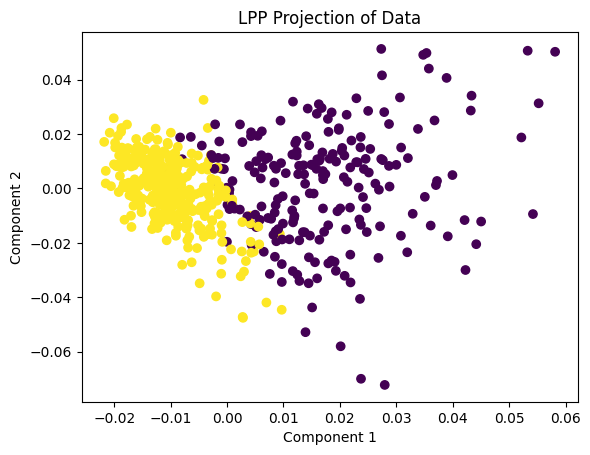

In [168]:

scaler = StandardScaler()
X = scaler.fit_transform(explain)
#LPPを使用して次元削減
from lpproj import LocalityPreservingProjection
#LPPを実行
lpp = LocalityPreservingProjection(n_components=2)
X_2D = lpp.fit_transform(X)
plt.figure()
plt.scatter(X_2D[:, 0], X_2D[:, 1],c=target.values)
plt.title('LPP Projection of Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


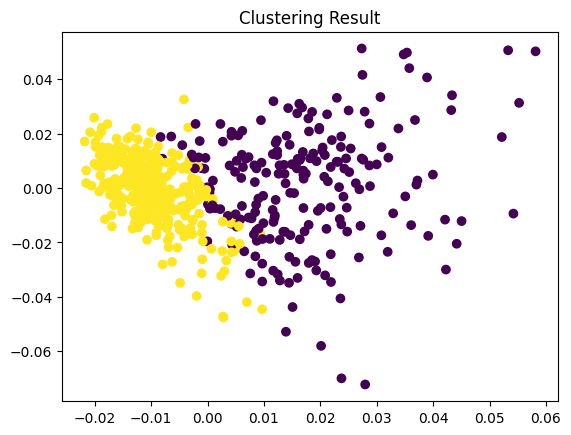

In [182]:
#低次元で、K-Meansクラスタリングを実行
model = KMeans(n_clusters=2, random_state=42)
cluster = model.fit_predict(X_2D)
#結果を可視化
plt.scatter(X_2D[:, 0], X_2D[:, 1],c=target.values)
plt.title('Clustering Result')
plt.show()

In [183]:
cluster_0 = df[df["target"]==0]
cluster_1 = df[df["target"]==1]
print("sum:",len(df),len(cluster_0),len(cluster_1))

sum: 569 212 357


In [184]:
#lassoを使用してクラスターを区別するために重要な特徴量を選択
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X, cluster)
#係数の取得
coefficients = lasso.coef_
#係数の絶対値に基づく特徴量の重要性を取得
feature_importance = np.abs(coefficients)
# 重要性でソートされた特徴量のインデックスを取得
sorted_index = np.argsort(feature_importance)[::-1]
# ソートされた特徴量の名前と重要性を出力
print("Feature importance sorted:")
column_names = explain.columns
for idx in sorted_index:
    print(f"{column_names[idx]}:{feature_importance[idx]}")

Feature importance sorted:
worst radius:0.14145452056305444
mean concave points:0.09665388222438767
worst concavity:0.06778251424644471
worst fractal dimension:0.06377565117828783
worst concave points:0.03794781153313896
mean concavity:0.017265430631417167
radius error:0.017166221108910043
concave points error:0.014319977933705375
worst smoothness:0.014130861642489037
mean symmetry:0.011857170398222842
symmetry error:0.009884106396550267
smoothness error:0.009528011907473218
mean texture:0.008234521627734923
fractal dimension error:0.00577537971168681
worst symmetry:0.003504667023232133
texture error:0.000702437807281771
worst area:0.0
mean perimeter:0.0
mean area:0.0
mean smoothness:0.0
mean compactness:0.0
worst compactness:0.0
worst perimeter:0.0
concavity error:0.0
mean fractal dimension:0.0
worst texture:0.0
perimeter error:0.0
area error:0.0
compactness error:0.0
mean radius:0.0


In [173]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

# NMIの計算
predicted_labels = cluster
nmi_score = normalized_mutual_info_score(np.reshape(target,(-1)), predicted_labels)

# Purityの計算
def purity_score(y_true, y_pred):
    contingency = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

purity = purity_score(target, predicted_labels)

# 結果の出力
print(f"NMI Score: {nmi_score}")
print(f"Purity: {purity}")

NMI Score: 0.5459681766643826
Purity: 0.9086115992970123


0.05以上

/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_76490/3998447653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = cluster


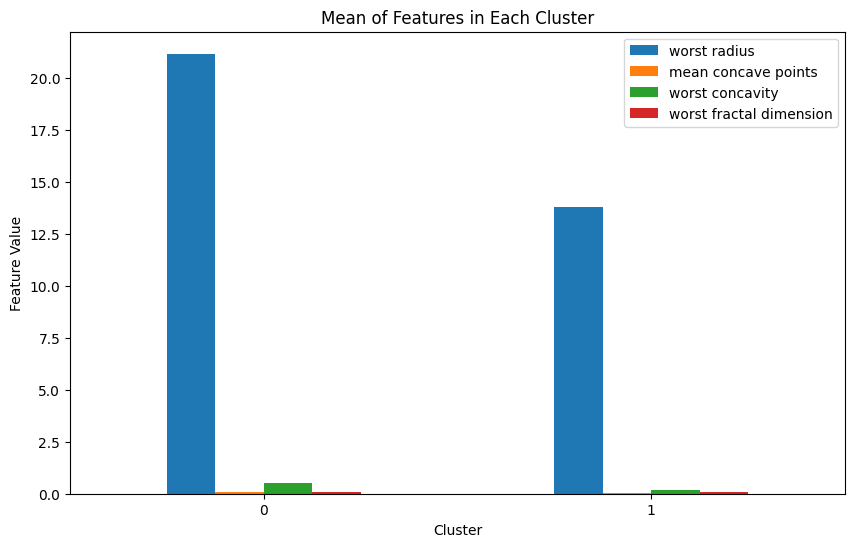

In [161]:
columns = ["worst radius","mean concave points","worst concavity","worst fractal dimension"]
new_df = explain[columns]
new_df['cluster'] = cluster
cluster_means = new_df.groupby('cluster').mean()
cluster_means[columns].plot(kind='bar', figsize=(10, 6))
plt.title('Mean of Features in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

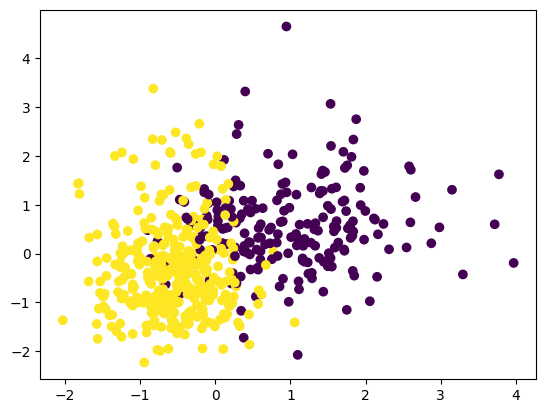

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as sd
from matplotlib.colors import ListedColormap
from sklearn import preprocessing as pp
from sklearn import cluster
from io import BytesIO


# データスケーリング
data_scaled = pp.scale(explain)

# スペクトラルクラスタリング
spkm = cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
res_spkm = spkm.fit(data_scaled)

# プロットをバッファに保存する

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=target.values)
plt.show()

In [175]:
res_spkm.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [164]:
#lassoを使用してクラスターを区別するために重要な特徴量を選択
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(data_scaled,res_spkm.labels_)
#係数の取得
coefficients = lasso.coef_
#係数の絶対値に基づく特徴量の重要性を取得
feature_importance = np.abs(coefficients)
# 重要性でソートされた特徴量のインデックスを取得
sorted_index = np.argsort(feature_importance)[::-1]
# ソートされた特徴量の名前と重要性を出力
print("Feature importance sorted:")
column_names = explain.columns
for idx in sorted_index:
    print(f"{column_names[idx]}:{feature_importance[idx]}")

Feature importance sorted:
worst radius:0.15454476102591655
mean concave points:0.11489060530566275
worst concavity:0.050542360572770326
worst symmetry:0.049630888621584754
worst concave points:0.04370716208353621
worst fractal dimension:0.02251334310812928
radius error:0.019375296719621304
worst smoothness:0.017223325031663298
worst texture:0.013207928942856493
symmetry error:0.00740533278039689
mean texture:0.006741683781704277
texture error:0.00640212520637944
mean concavity:0.0016119518398534092
mean perimeter:0.0
mean area:0.0
mean smoothness:0.0
mean compactness:0.0
mean symmetry:0.0
mean fractal dimension:0.0
smoothness error:0.0
perimeter error:0.0
area error:0.0
compactness error:0.0
concavity error:0.0
concave points error:0.0
fractal dimension error:0.0
worst perimeter:0.0
worst area:0.0
worst compactness:0.0
mean radius:0.0


/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_76490/3780789217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = res_spkm.labels_


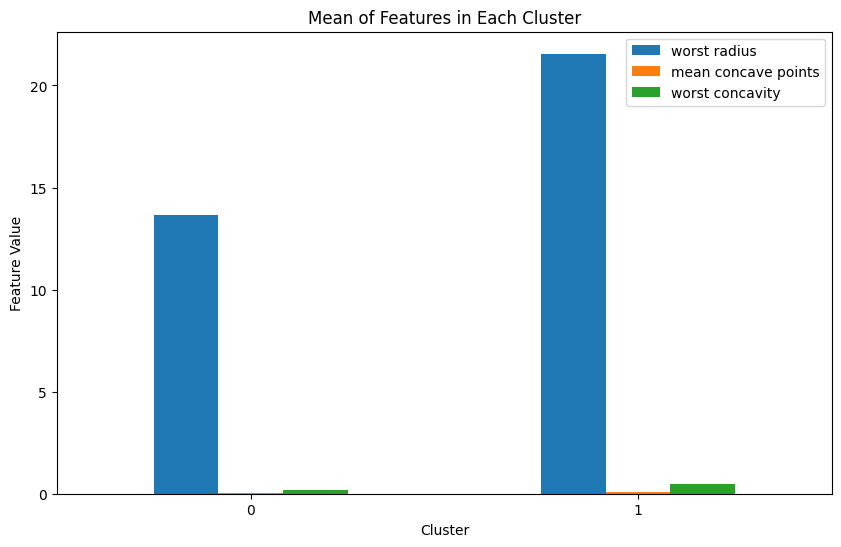

In [176]:
columns = ["worst radius","mean concave points","worst concavity"]
new_df = explain[columns]
new_df['cluster'] = res_spkm.labels_
cluster_means = new_df.groupby('cluster').mean()
cluster_means[columns].plot(kind='bar', figsize=(10, 6))
plt.title('Mean of Features in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

In [180]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

# NMIの計算
predicted_labels =  res_spkm.labels_
nmi_score = normalized_mutual_info_score(np.reshape(target,(-1)), predicted_labels)

# Purityの計算
def purity_score(y_true, y_pred):
    contingency = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

purity = purity_score(target, predicted_labels)

# 結果の出力
print(f"NMI Score: {nmi_score}")
print(f"Purity: {purity}")

NMI Score: 0.6626957118108623
Purity: 0.9367311072056239


0.5以上ものを選択


/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_76490/956545296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = cluster


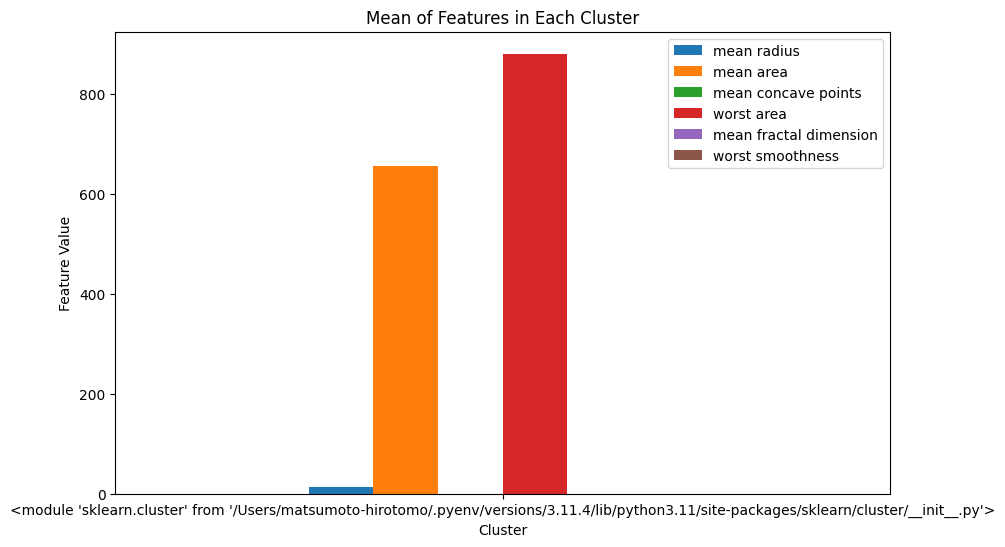

In [178]:
columns = ["mean radius","mean area","mean concave points","worst area","mean fractal dimension","worst smoothness"]
new_df = explain[columns]
new_df['cluster'] = cluster
cluster_means = new_df.groupby('cluster').mean()
cluster_means[columns].plot(kind='bar', figsize=(10, 6))
plt.title('Mean of Features in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_76490/356184305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = cluster


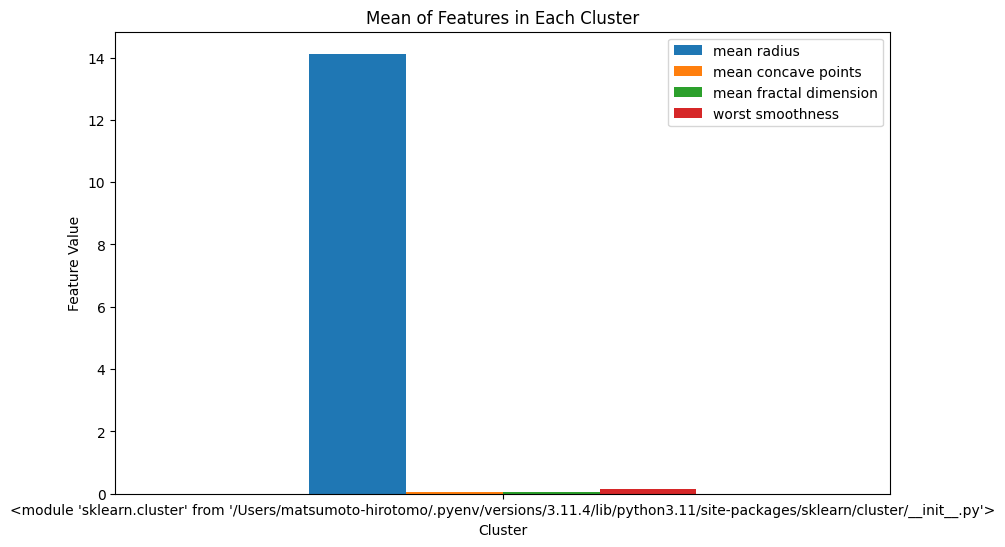

In [179]:
columns = ["mean radius","mean concave points","mean fractal dimension","worst smoothness"]
new_df = explain[columns]
new_df['cluster'] = cluster
cluster_means = new_df.groupby('cluster').mean()
cluster_means[columns].plot(kind='bar', figsize=(10, 6))
plt.title('Mean of Features in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_76490/2675125899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = cluster


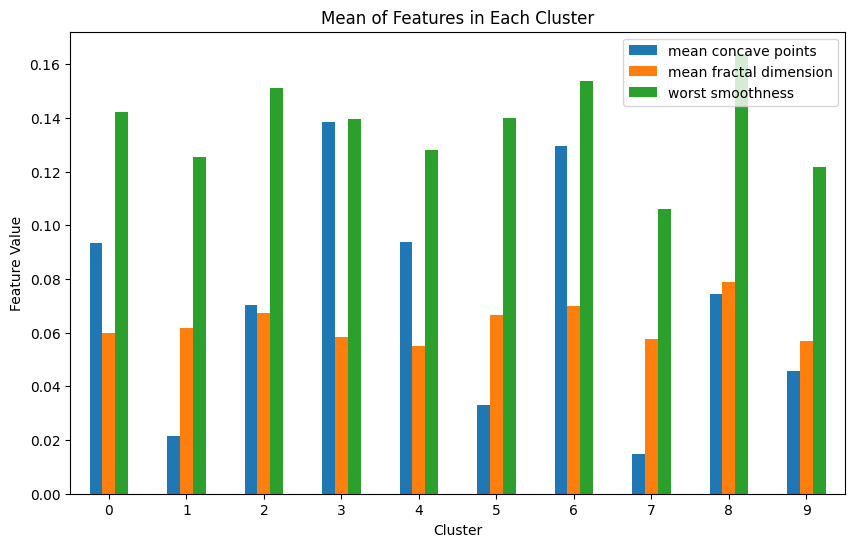

In [122]:
columns = ["mean concave points","mean fractal dimension","worst smoothness"]
new_df = explain[columns]
new_df['cluster'] = cluster
cluster_means = new_df.groupby('cluster').mean()
cluster_means[columns].plot(kind='bar', figsize=(10, 6))
plt.title('Mean of Features in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()